In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes2.csv')

In [3]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Splitting the dataset into train and test sets

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis =1)
y = df['Outcome']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
#Combined train dataset

df_train = pd.concat([X_train, y_train], axis=1)
df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.0,0.304,21,0
618,9,112,82,24,0,28.2,1.282,50,1
346,1,139,46,19,83,28.7,0.654,22,0
294,0,161,50,0,0,21.9,0.254,65,0
231,6,134,80,37,370,46.2,0.238,46,1
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,0
106,1,96,122,0,0,22.4,0.207,27,0
270,10,101,86,37,0,45.6,1.136,38,1
435,0,141,0,0,0,42.4,0.205,29,1


In [9]:
df_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Descriptive analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def plot_data_bar_plot(df_train, column_name, title_size=14, axis_size=12, tick_size=10):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_train, x=column_name, palette="husl")
    plt.title(f'Barplot of {column_name}', fontsize=title_size)
    plt.ylabel('Count', fontsize=axis_size)
    plt.xlabel(column_name, fontsize=axis_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.show()

def plot_data_histogram(df, column_name, title_size=14, axis_size=12, tick_size=10, bins = 5):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name],bins = bins, color = 'pink')
    plt.title(f'Histogram of {column_name}', fontsize=title_size)
    plt.xlabel(column_name, fontsize=axis_size)
    plt.ylabel('Frequency', fontsize=axis_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.show()

def plot_data_boxplot(df, column_name1,column_name2 ,title_size=14, axis_size=12, tick_size=10):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name1],y=df[column_name2],palette="Oranges")
    #sns.color_palette("Spectral", as_cmap=True)
    plt.title(f'Boxplot of {column_name1} with {column_name2}', fontsize=title_size)
    plt.xlabel(column_name1, fontsize=axis_size)
    plt.ylabel(column_name2, fontsize=axis_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.show()

def plot_data_scatter(df, column_name1,column_name2 ,title_size=14, axis_size=12, tick_size=10):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[column_name1],y=df[column_name2],color = 'orange')
    plt.title(f'Scatterplot of {column_name1} with {column_name2}', fontsize=title_size)
    plt.xlabel(column_name1, fontsize=axis_size)
    plt.ylabel(column_name2, fontsize=axis_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.show()


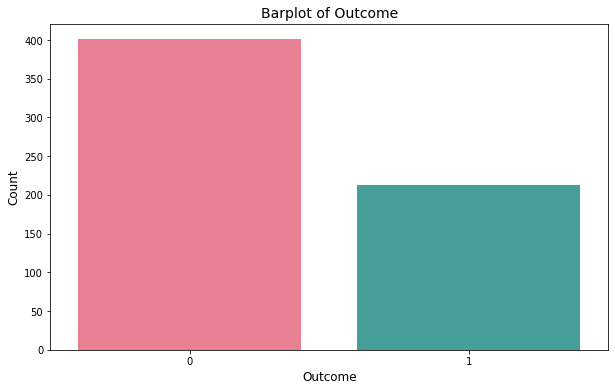

In [12]:
plot_data_bar_plot(df_train, 'Outcome')



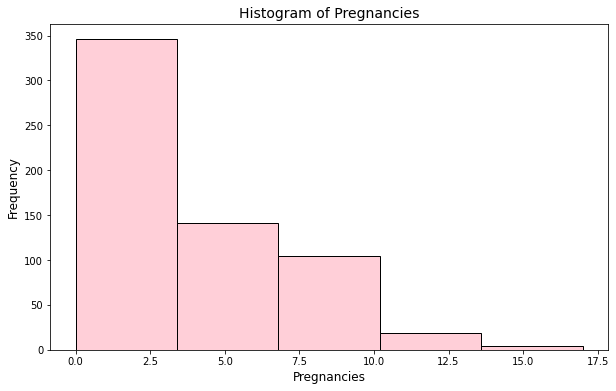

In [13]:
plot_data_histogram(df_train, 'Pregnancies')


In [14]:
df_train[df_train['Pregnancies']>10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
745,12,100,84,33,105,30.0,0.488,46,0
28,13,145,82,19,110,22.2,0.245,57,0
357,13,129,0,30,0,39.9,0.569,44,1
559,11,85,74,0,0,30.1,0.300,35,0
323,13,152,90,33,29,26.8,0.731,43,1
24,11,143,94,33,146,36.6,0.254,51,1
333,12,106,80,0,0,23.6,0.137,44,0
518,13,76,60,0,0,32.8,0.180,41,0
88,15,136,70,32,110,37.1,0.153,43,1
274,13,106,70,0,0,34.2,0.251,52,0


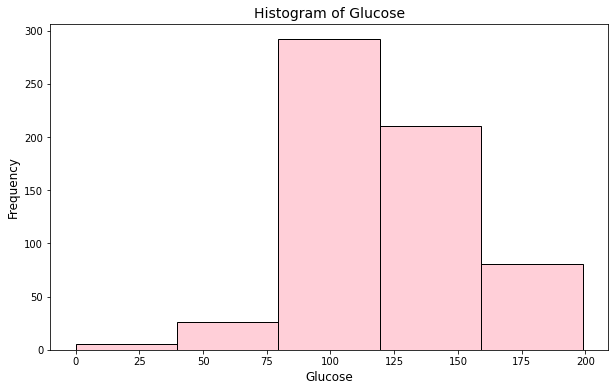

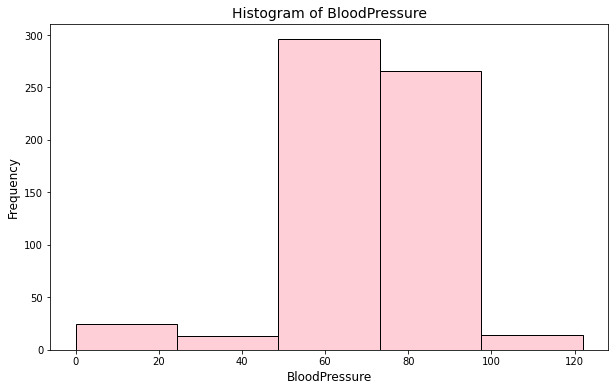

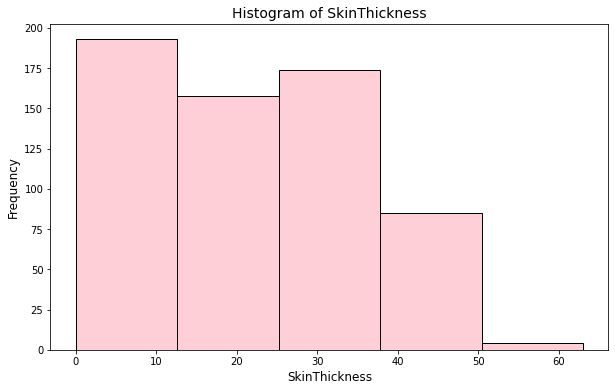

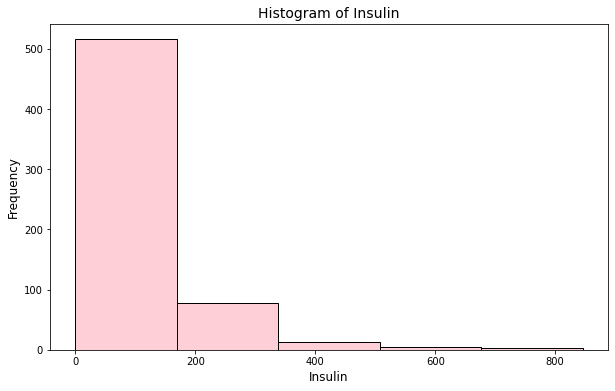

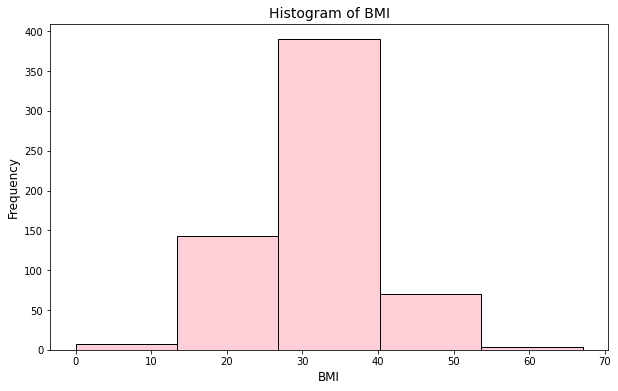

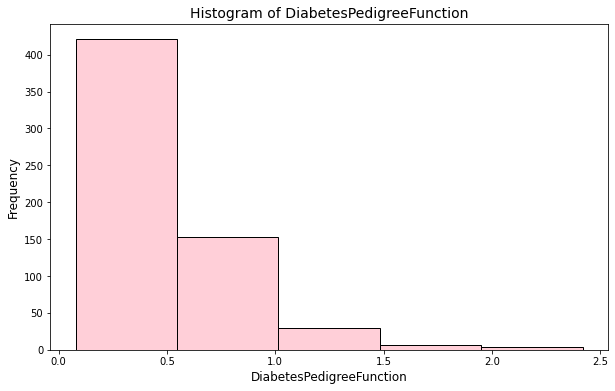

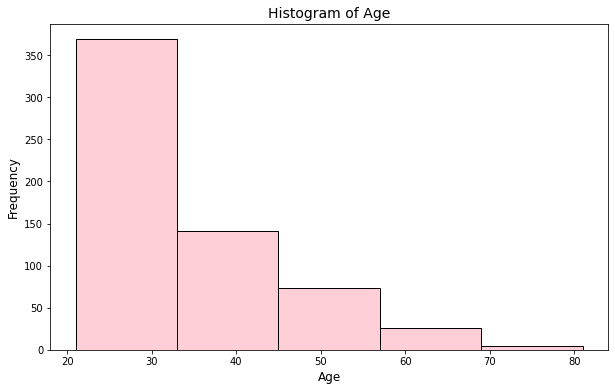

In [15]:
plot_data_histogram(df_train, 'Glucose')

plot_data_histogram(df_train, 'BloodPressure')

plot_data_histogram(df_train, 'SkinThickness')

plot_data_histogram(df_train, 'Insulin')

plot_data_histogram(df_train, 'BMI')

plot_data_histogram(df_train, 'DiabetesPedigreeFunction')

plot_data_histogram(df_train, 'Age')

In [16]:
df_train['Pregnancies'].describe()


count    614.000000
mean       3.742671
std        3.313264
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [17]:
df_train['Glucose'].describe()

count    614.000000
mean     120.855049
std       32.035057
min        0.000000
25%      100.000000
50%      117.000000
75%      139.000000
max      199.000000
Name: Glucose, dtype: float64

In [18]:
df_train['BloodPressure'].describe()

count    614.000000
mean      69.415309
std       18.512599
min        0.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [19]:
df_train['SkinThickness'].describe()

count    614.000000
mean      20.399023
std       15.433974
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       63.000000
Name: SkinThickness, dtype: float64

In [20]:
df_train['Insulin'].describe()

count    614.000000
mean      81.438111
std      116.234835
min        0.000000
25%        0.000000
50%       42.500000
75%      129.750000
max      846.000000
Name: Insulin, dtype: float64

In [21]:
df_train['BMI'].describe()

count    614.000000
mean      31.983388
std        7.740625
min        0.000000
25%       27.100000
50%       32.000000
75%       36.375000
max       67.100000
Name: BMI, dtype: float64

In [22]:
df_train['DiabetesPedigreeFunction'].describe()

count    614.000000
mean       0.469168
std        0.336847
min        0.078000
25%        0.241500
50%        0.372500
75%        0.613750
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [23]:
df_train['Age'].describe()

count    614.000000
mean      32.907166
std       11.503437
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64

# Correlation Analysis

In [24]:
df_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

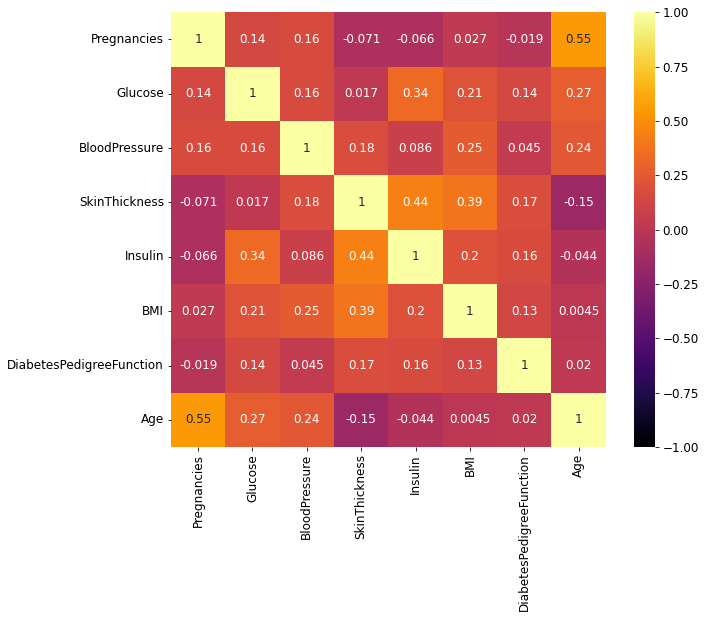

In [25]:
set1_num = df_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]


# Compute the correlation matrix
correlation_matrix = set1_num.corr()


# Generate a heatmap
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', vmin=-1, vmax=1, center=0, square=True)
plt.show()

In [26]:
# Categorical response vs predictors

from itertools import combinations
import scipy.stats as stats


Numerical_predictors = df_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
categorical_predictors = ['Outcome']


numerical_vars = Numerical_predictors.columns.tolist()
categorical_vars = categorical_predictors

for num_var in numerical_vars:
    for cat_var in categorical_vars:
        # Check if categorical variable is binary
        if df_train[cat_var].nunique() == 2:
            # Compute Point-Biserial Correlation
            corr, p = stats.pointbiserialr(df_train[num_var], df_train[cat_var].astype('category').cat.codes)
            print(f"Point-Biserial Correlation between {num_var} and {cat_var}:")
            print(f"Correlation: {corr}, p-value: {p}\n")
        else:
            # Compute ANOVA
            groups = [df_train[num_var][df_train[cat_var] == cat] for cat in df_train[cat_var].unique()]
            fvalue, pvalue = stats.f_oneway(*groups)
            print(f"ANOVA between {num_var} and {cat_var}:")
            print(f"F-value: {fvalue}, p-value: {pvalue}\n")


Point-Biserial Correlation between Pregnancies and Outcome:
Correlation: 0.20755039175672022, p-value: 2.1139832307188597e-07

Point-Biserial Correlation between Glucose and Outcome:
Correlation: 0.4561170864471029, p-value: 7.069402428073742e-33

Point-Biserial Correlation between BloodPressure and Outcome:
Correlation: 0.08204582281746335, p-value: 0.04212330191999194

Point-Biserial Correlation between SkinThickness and Outcome:
Correlation: 0.05791195680282034, p-value: 0.15177765098627816

Point-Biserial Correlation between Insulin and Outcome:
Correlation: 0.10849754791014452, p-value: 0.0071252597731583794

Point-Biserial Correlation between BMI and Outcome:
Correlation: 0.30633533518382033, p-value: 8.31970785542855e-15

Point-Biserial Correlation between DiabetesPedigreeFunction and Outcome:
Correlation: 0.15455980911661935, p-value: 0.00012047077049406859

Point-Biserial Correlation between Age and Outcome:
Correlation: 0.28065435174531983, p-value: 1.4105385726255756e-12



## PLS AND MCA

In [27]:
pip install prince


Defaulting to user installation because normal site-packages is not writeable
  Using cached prince-0.13.0-py3-none-any.whl.metadata (638 bytes)
  Using cached altair-5.3.0-py3-none-any.whl.metadata (9.2 kB)
  Using cached toolz-0.12.1-py3-none-any.whl.metadata (5.1 kB)
   --------------------------------------- 415.6/415.6 kB 13.2 kB/s eta 0:00:00
   --------------------------------------- 857.8/857.8 kB 15.1 kB/s eta 0:00:00
   ---------------------------------------- 56.1/56.1 kB 19.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import prince

In [29]:

from prince import MCA

In [30]:
Numerical_predictors.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [31]:
#Scaling the numerical data
from numpy import asarray
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()

# transform data
pred_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

Numerical_predictors[pred_to_scale] = scaler.fit_transform(Numerical_predictors[pred_to_scale])

Numerical_predictors


C:\Users\Acer\AppData\Local\Temp\ipykernel_16928\3331234091.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Numerical_predictors[pred_to_scale] = scaler.fit_transform(Numerical_predictors[pred_to_scale])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
618,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
346,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
294,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
231,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095
...,...,...,...,...,...,...,...,...
71,0.379793,0.566871,-0.292759,0.946800,0.504235,-0.437451,-0.172824,-0.600933
106,-0.828460,-0.776503,2.842797,-1.322774,-0.701206,-1.239073,-0.778934,-0.513932
270,1.890109,-0.620297,0.896590,1.076490,-0.701206,1.760544,1.981245,0.443084
435,-1.130523,0.629354,-3.752683,-1.322774,-0.701206,1.346804,-0.784877,-0.339929


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

# Sample data (replace this with your own dataset)
X = Numerical_predictors
y = df_train['Outcome']

X.columns = X.columns.astype(str)

# Create and fit the PLS model
model1 = PLSRegression(n_components=2)
model1.fit(X, y)

# Summary of the PLS model (equivalent to summary(model1) in R)
print("PLS Summary:")
print("R-squared (calibration):", model1.score(X, y))
#print("R-squared (test):", model1.score(xt, yt))



PLS Summary:
R-squared (calibration): 0.3018443578965224


<Figure size 1440x720 with 0 Axes>

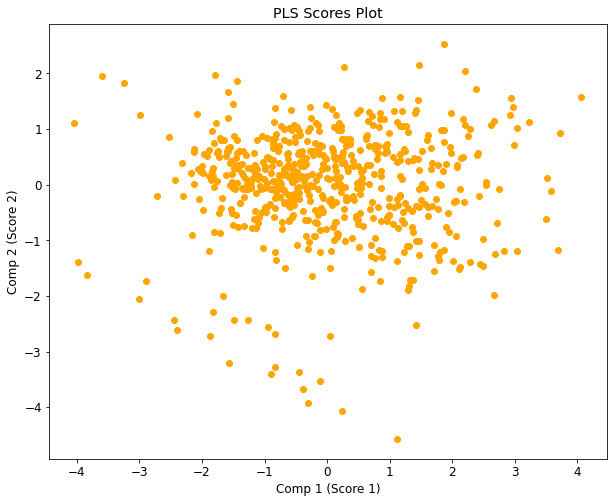

<Figure size 1440x720 with 0 Axes>

In [33]:
#### Plot the PLS model
plt.figure(figsize=(10, 8))

plt.scatter(model1.x_scores_[:, 0], model1.x_scores_[:, 1], color='orange')
plt.xlabel('Comp 1 (Score 1)')
plt.ylabel('Comp 2 (Score 2)')
plt.title('PLS Scores Plot')
plt.figure(figsize=(20,10))





In [34]:
# Get the scores of the first two components
scores = model1.x_scores_[:, :2]

# Calculate the total variance of the input data
total_variance = np.var(X, axis=0).sum()

# Calculate the variance of the scores
scores_variance = np.var(scores, axis=0).sum()
scores_variance

# Calculate the proportion of variance explained by the first two components
variance_explained = scores_variance / total_variance

print(f"Variance explained by the first two components: {variance_explained * 100}%")


Variance explained by the first two components: 33.31521909091356%


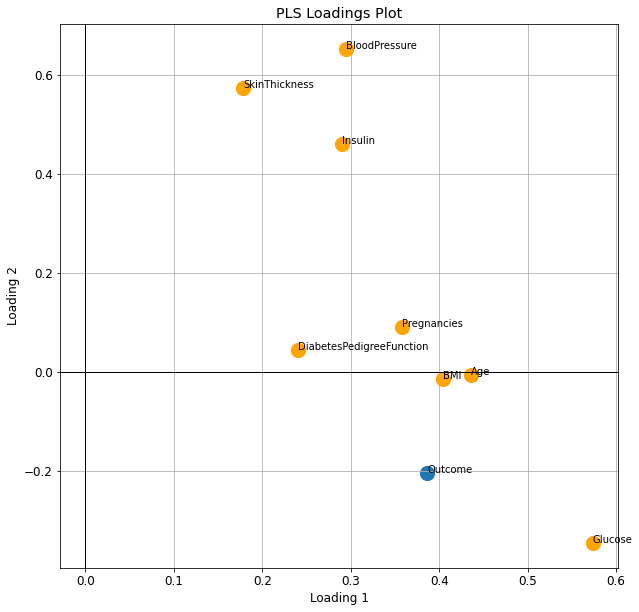

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(model1.x_loadings_[:, 0], model1.x_loadings_[:, 1], s=200,color='orange')
plt.xlabel('Loading 1')
plt.ylabel('Loading 2')
plt.title('PLS Loadings Plot')
plt.rcParams['font.size'] = 10   # Set the default font size for all elements

# Annotate the data points with feature names
for i, feature_name in enumerate(X.columns):
    plt.annotate(feature_name, (model1.x_loadings_[i, 0], model1.x_loadings_[i, 1]))


plt.scatter(model1.y_loadings_[:, 0], model1.y_loadings_[:, 1], s = 200)
plt.annotate('Outcome', (model1.y_loadings_[:, 0], model1.y_loadings_[:, 1]))
plt.axhline(0, color='black',linewidth=1.0)
plt.axvline(0, color='black',linewidth=1.0)
plt.grid(True)
plt.show()

# Outlier detection using PLS

In [36]:
from sklearn.model_selection import cross_val_predict
from scipy.stats import zscore
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
y_pred = cross_val_predict(model1, Numerical_predictors, y, cv=5)


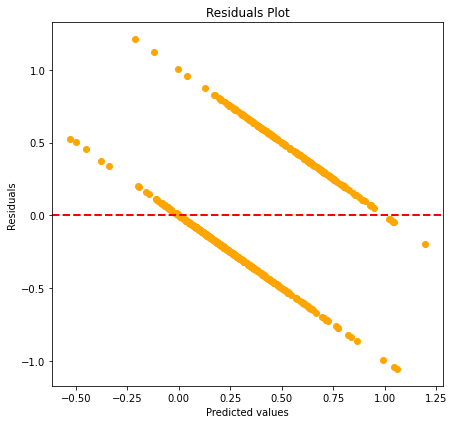

In [37]:
# Calculate standardized residuals
residuals = y - y_pred.flatten()
residuals_std = zscore(residuals)

# Mahalanobis distance
mahalanobis_distance = np.sqrt(np.sum(residuals_std**2))

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred.flatten(), residuals,color='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

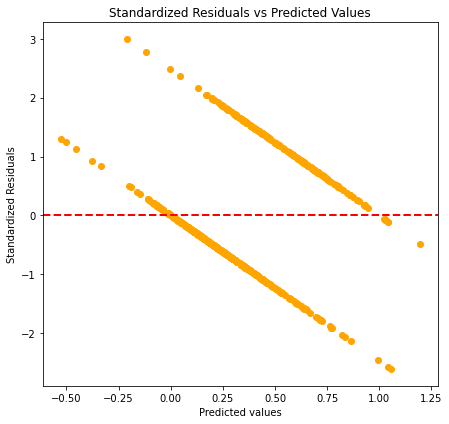

In [38]:
# Calculate standardized residuals
residuals = y - y_pred.flatten()
residuals_std = zscore(residuals)

# Mahalanobis distance
mahalanobis_distance = np.sqrt(np.sum(residuals_std**2))

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred.flatten(), residuals_std,color='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Standardized Residuals vs Predicted Values')
plt.xlabel('Predicted values')
plt.ylabel('Standardized Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# R

# Logistic Regression Model with outliers

# Logistic Regression Model without outliers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)


C:\Users\Acer\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.75
Confusion Matrix:
[[78 21]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)


C:\Users\Acer\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = logistic_model.predict(X_test)


In [42]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.75
Confusion Matrix:
[[78 21]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

